In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [165]:
df = pd.read_csv("StudentsPerformance.csv")

In [166]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [167]:
df.shape

(1000, 8)

In [168]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Skewness of numerical columns:
 math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64


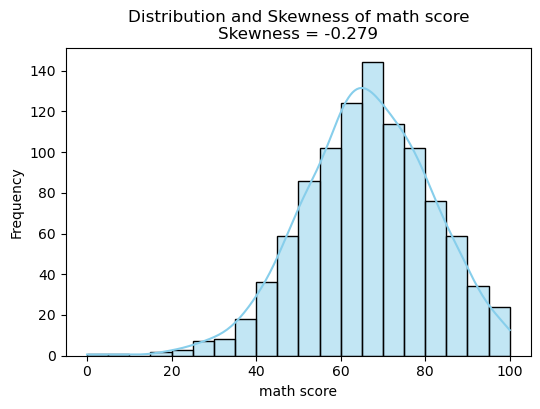

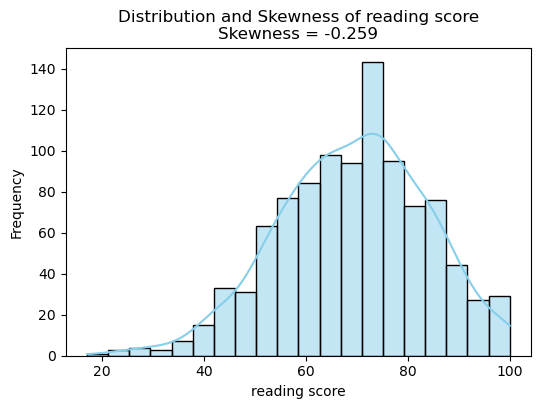

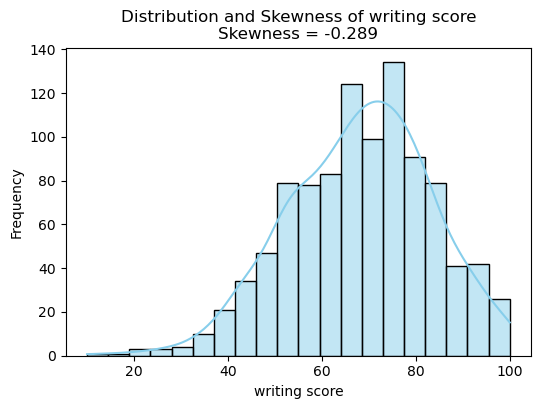

In [169]:

columns = ['math score', 'reading score', 'writing score']

# Calculate skewness
skew_values = df[columns].skew()
print("Skewness of numerical columns:\n", skew_values)

# Plot each column separately
for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution and Skewness of {col}\nSkewness = {skew_values[col]:.3f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [170]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['race/ethnicity', 'lunch']  # only encode these with LabelEncoder
le = LabelEncoder()

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

# 1 = completed, 0 = none
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})


In [171]:
df.head(5)  

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,bachelor's degree,1,0,72,72,74
1,female,2,some college,1,1,69,90,88
2,female,1,master's degree,1,0,90,95,93
3,male,0,associate's degree,0,0,47,57,44
4,male,2,some college,1,0,76,78,75


In [172]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['race/ethnicity', 'lunch'] 
le = LabelEncoder()

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

# 1 = completed, 0 = none
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})



In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

# Select features and target
X = df[["parental level of education", "test preparation course"]]
y = df["math score"]

#  Encode categorical features
encoder = ColumnTransformer([
    ("encode", OneHotEncoder(drop="first"), ["parental level of education", "test preparation course"])
], remainder="passthrough")

#  Split dataset and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_enc = encoder.fit_transform(X_train)  # fit encoder on training
X_test_enc = encoder.transform(X_test)        # transform test set

model = LinearRegression()
model.fit(X_train_enc, y_train)

#  Predict for a new student
new_student = pd.DataFrame({
    "parental level of education": ["bachelor's degree"],
    "test preparation course": ["completed"]
})
pred = model.predict(encoder.transform(new_student))
print("Predicted Math Score:", round(pred[0], 2))

# Show intercept and feature influence
print(f"\nIntercept: {model.intercept_:.2f}")

feature_names = encoder.get_feature_names_out()
coefs = model.coef_
influence = dict(zip(feature_names, coefs))

bachelor_effect = influence.get("encode__parental level of education_bachelor's degree", 0)
prep_effect = influence.get("encode__test preparation course_none", 0)

print(f"Parent with Bachelor's degree → +{bachelor_effect:.2f}")
print(f"Completed test preparation → +{abs(prep_effect):.2f}")


Predicted Math Score: 73.63

Intercept: 71.71
Parent with Bachelor's degree → +1.92
Completed test preparation → +5.11


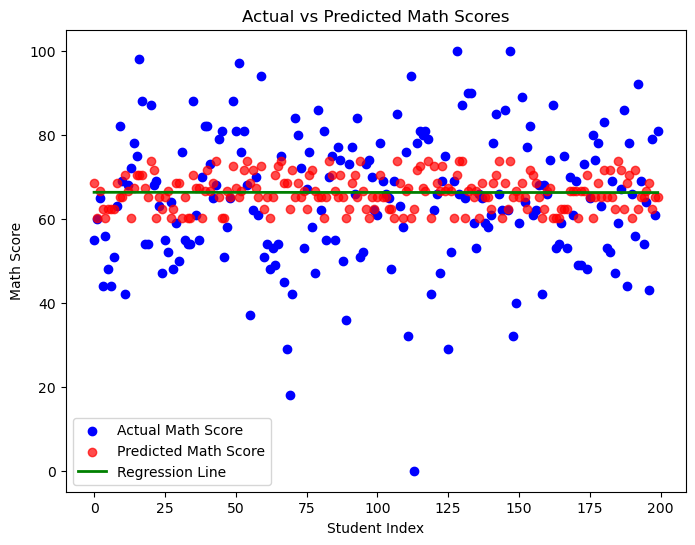

In [ ]:

# Scatter plot of actual vs predicted scores
y_pred = model.predict(X_test_enc)

plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Math Score')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Math Score', alpha=0.7)

# Regression line for visualization
z = np.polyfit(range(len(y_test)), y_pred, 1)
p = np.poly1d(z)
plt.plot(range(len(y_test)), p(range(len(y_test))), color='green', linewidth=2, label='Regression Line')

plt.xlabel('Student Index')
plt.ylabel('Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.legend()
plt.show()